![title](../images/header.png)

Merging all CEO data (2015-2022/2023)
-------
This notebook merges validated data from different CEO CAFI projects
CEO data must be merged and harmonized using the merge clean ceo data scripts
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [2]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CAF'

In [3]:
# output file all CEO validated data file 
#ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2015_2020_2022_2023_clean.csv'
ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2015_2022_2023_clean.csv'

### 1. Read all CEO sample files

##### CEO data from phase I (optional)

In [ ]:
ceo1520 = pd.read_csv('/home/sepal-user/CAFI_DDD/CAFI files/CAFI_all_ceo_validation_2015_2020_uniqueID.csv', low_memory=False)
ceo1520.reset_index(inplace=True)
ceo1520['collection']='coll_1520'
phase_I_columns = ceo1520.columns.tolist()
phase_I_columns

##### for 2015-2022 CEO sample data

In [4]:
ceo1522 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_1522_clean.csv')
print(ceo1522.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

##### use outputs from merge_clean_ceo_all_data

In [5]:
# use QC outputs if desired
ceo2023 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2023_clean_qc.csv')
print(ceo2023.columns.tolist())

['ID', 'ID.1', 'plotid', 'sampleid', 'lon', 'lat', 'TNT_stratum', 'sample_geom', 'Ref_FNF_2022', 'Ref_Regeneration', 'Ref_Change_2023', 'Ref_Change_Type_2023', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'collection', 'interpreted', 'Ref_LCover_2022', 'Ref_Change_Year_2023', 'Ref_Change_LCover_2023', 'Def2023', 'Deg2023', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg', 'Swamp_Deg', 'Gallery_Deg', 'Plantation_Deg', 'Woodland_Deg', 'DensFor_Stable', 'DensDryFor_Stable', 'SecFor_Stable', 'DryOpenFor_Stable'

### end of parameters

In [6]:
#ceo1520 = ceo1520.loc[ceo1520['ISO'] == iso]

In [7]:
#len(ceo1520)

In [8]:
len(ceo1522)

4377

In [9]:
len(ceo2023)

1678

### merge all

In [10]:
#data_frames =[ceo1520, ceo1522, ceo2023]
data_frames =[ceo1522, ceo2023]

# Source file names corresponding to each data frame
#source_file = ['ceo_1520','ceo_1522', 'ceo_2023']  # Replace with your file names
source_file = ['ceo_1522', 'ceo_2023']  # Replace with your file names

# Merge data frames and add a new column for source file name
merged_ceo = pd.concat([df.assign(sampling=source_file) for df, source_file in zip(data_frames, source_file)], ignore_index=True)

In [11]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,ID.1,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc
0,0,1722,1722.0,1722,15.352268,7.276064,POINT(15.352268 7.276064),1.0,NaN,1.0,Def,0,0,0,0,0,0,NaN,0,0,1,2017.0,NaN,3.0,coll_1522_1,1,3.0,Def2017,Def_3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,378369,378369.0,378369,22.986350,8.020981,POINT(22.98635 8.020981),0.0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,376353,376353.0,376353,22.707893,7.550748,POINT(22.707893 7.550748),0.0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,375977,375977.0,375977,23.336864,8.813592,POINT(23.336864 8.813592),0.0,non,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,374366,374366.0,374366,22.846944,7.899005,POINT(22.846944 7.899005),0.0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(merged_ceo)

6055

In [13]:
merged_ceo['collection'].value_counts(dropna=False)

collection
coll_1522_2    3878
coll_2023_2     798
coll_1522_1     499
coll_2023_1     497
coll_2023_3     383
Name: count, dtype: int64

In [14]:
print(merged_ceo.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

### 2. Combine and consolidate columns

In [15]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].fillna(merged_ceo['Ref_Ftype_2022']).astype(float).fillna(0).astype(int).astype(str)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
12    1297
11    1055
0     1004
15     795
13     626
1      472
4      251
9      227
2      174
3       85
16      42
8       15
14       7
17       3
10       2
Name: count, dtype: int64

In [16]:
# Create the new 'Ref_FNF' column
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].astype(float)

condition = merged_ceo['Ref_LCover_2015'] < 12

# Apply the condition using numpy.where
merged_ceo['Ref_FNF_2015'] = np.where(condition, 1, 
                                             np.where(merged_ceo['Ref_LCover_2015'].notna(), 0, np.nan))
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1.0    3285
0.0    2770
Name: count, dtype: int64

In [17]:
merged_ceo['Ref_FNF_2015']=merged_ceo['Ref_FNF_2015'].fillna(0).astype(int).astype(str)
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    3285
0    2770
Name: count, dtype: int64

In [18]:
merged_ceo['Woodland_Def'].value_counts(dropna=False)

Woodland_Def
0    6041
1      14
Name: count, dtype: int64

In [19]:
#merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1520'].fillna(merged_ceo['Ref_Change_Type_1522']).fillna(merged_ceo['Ref_Change_Type_2023'])
merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1522'].fillna(merged_ceo['Ref_Change_Type_2023'])

# Set rows where Ref_Change_Type_2023 is 'NF' to NaN
merged_ceo.loc[merged_ceo['Ref_Change_Type_2023'] == 'NF', 'Ref_Change_Type'] = pd.NA

# Print the value counts
print(merged_ceo['Ref_Change_Type_1523'].value_counts(dropna=False))

Ref_Change_Type_1523
NF        3774
Stable    2199
Deg         45
Def         37
Name: count, dtype: int64


In [20]:
#merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1520'].fillna(merged_ceo['Ref_Change_Year_1522']).fillna(merged_ceo['Ref_Change_Year_2023'])
merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1522'].fillna(merged_ceo['Ref_Change_Year_2023'])

merged_ceo['Ref_Change_Year_1523'].value_counts(dropna=False)

Ref_Change_Year_1523
NF         3774
Stable     2199
Def2021       9
Deg2022       9
Deg2019       9
Deg2023       8
Def2022       8
Deg2021       7
Deg2018       6
Def2017       5
Def2018       4
Deg2020       4
Def2023       4
Def2016       3
Def2020       2
Deg2017       2
Def2019       2
Name: count, dtype: int64

In [21]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Type_1523'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,coll_1522_1,coll_1522_2,coll_2023_1,coll_2023_2,coll_2023_3,Total
Ref_Change_Type_1523,,,,,,
Def,5.0,28.0,1.0,2.0,1.0,37
Deg,6.0,31.0,5.0,3.0,NaN,45
NF,305.0,2465.0,294.0,417.0,293.0,3774
Stable,183.0,1354.0,197.0,376.0,89.0,2199
Total,499.0,3878.0,497.0,798.0,383.0,6055


In [22]:
merged_ceo['ISO'] = iso

In [23]:
merged_ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
merged_ceo_column_names

['ID',
 'plotid',
 'point_id',
 'sampleid',
 'lon',
 'lat',
 'sample_geom',
 'Ref_FNF_2015',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'collection',
 'interpreted',
 'Ref_LCover_2015',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',
 'Woodland_Def',
 'DensFor

In [24]:
merged_ceo = merged_ceo.drop(columns=['ID.1','Ref_Change_Type',
 'TNT_stratum'])

### 3. plot change points by year

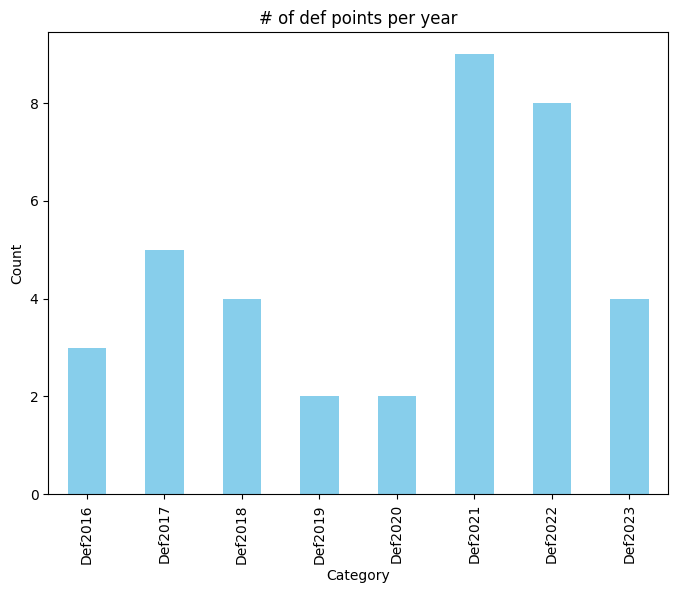

In [25]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Def2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

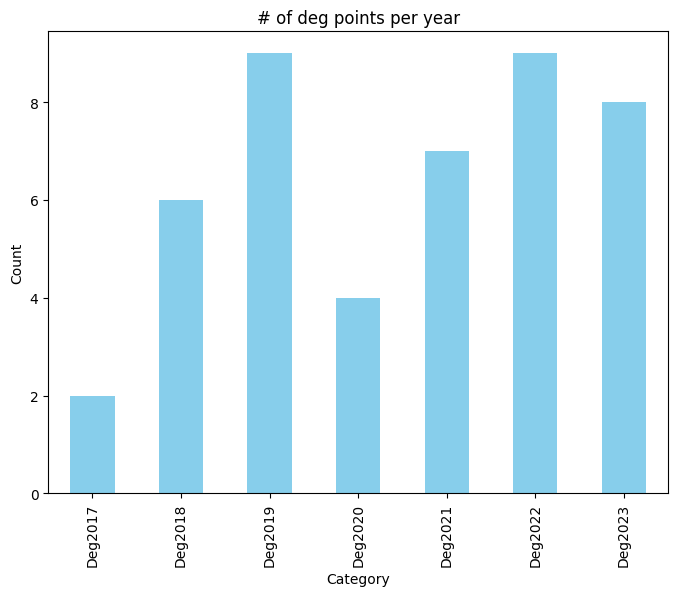

In [26]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','Deg2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [27]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc,Ref_Change_Type_1523,Ref_Change_Year_1523
0,0,1722,1722.0,1722,15.352268,7.276064,POINT(15.352268 7.276064),1,NaN,1.0,Def,0,0,0,0,0,0,NaN,0,0,1,2017.0,NaN,3.0,coll_1522_1,1,3.0,Def2017,Def_3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Def,Def2017
1,1,378369,378369.0,378369,22.986350,8.020981,POINT(22.98635 8.020981),0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NF
2,2,376353,376353.0,376353,22.707893,7.550748,POINT(22.707893 7.550748),0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NF
3,3,375977,375977.0,375977,23.336864,8.813592,POINT(23.336864 8.813592),0,non,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NF
4,4,374366,374366.0,374366,22.846944,7.899005,POINT(22.846944 7.899005),0,oui,0.0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12.0,NaN,coll_1522_1,1,12.0,NF,NF_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CAF,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NF


### 4. export ceo data to one csv file

In [28]:
merged_ceo.to_csv(ceo_data_out,index_label='UID')